# Mi primera red (MNIST,  clasificación de números con TensorFlow)

<img src="mnist_sample.png" style="width:30%">

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print('Estamos usando TensorFlow ', tf.__version__)

import sys
import warnings 
warnings.filterwarnings('ignore')

import matplotlib_utils
from importlib import reload
reload(matplotlib_utils)

import keras_utils
from keras_utils import reset_tf_session

Estamos usando TensorFlow  1.13.1


# Datos

Tenemos 50000 imágenes de 28x28 píxeles de números, del 0 al 9.
Se entrenará un clasificador para estos datos.

In [3]:
import preprocessed_mnist
X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_mnist.load_dataset()

X_train [dimensiones (50000, 28, 28)],  muestra:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]

Plot de la muestra:


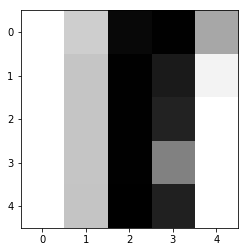


Un número completo


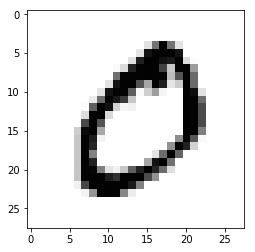

y_train [dimensiones (50000,)] 10 muestras:
 [5 0 4 1 9 2 1 3 1 4]


In [5]:
# X contiene valores en rgb, divididos entre 255 (normalizacion)
print('X_train [dimensiones %s],  muestra:\n' % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print('\nPlot de la muestra:')
plt.imshow(X_train[1, 15:20, 5:10], cmap='Greys')
plt.show();
print('\nUn número completo')
plt.imshow(X_train[1], cmap='Greys')
plt.show()
print('y_train [dimensiones %s] 10 muestras:\n' % (str(y_train.shape)), y_train[:10])

# Modelo lineal

La tarea es entrenar un clasificador lineal $\vec{x} \rightarrow y$ con SGD usando TensorFlow.

Necesitamos calcular una transformación lineal  $z_k$ para cada clase: 
$$z_k = \vec{x} \cdot \vec{w_k} + b_k \quad;k = 0..9$$

Y transformar $z_k$ a probabilidades $p_k$ con softmax (regresión logistica): 
$$p_k = \frac{e^{z_k}}{\sum_{i=0}^{9}{e^{z_i}}} \quad;k = 0..9$$

Como función de pérdida de usará la entropía cruzada (cross-entropy) para entrenar el clasificador multiclase:
$$\text{entropía cruzada}(y, p) = -\sum_{k=0}^{9}{\log(p_k)[y = k]}$$ 

donde
$$
[x]=\begin{cases}
       1, \quad \text{si $x$ es cierto} \\
       0, \quad \text{en el resto}
    \end{cases}
$$

La minimización de la entropía cruzada lleva $p_k$ cerca de 1 cuando $y = k$, que es lo que queremos.

La hoja de ruta es:
* Aplanar (flatten) las imágenes (28x28 -> 784) con `X_train.reshape((X_train.shape[0], -1))` para simplificar la implementación del modelo lineal.
* Convertir `y_train` a vectores one-hot, 0 y 1, es lo necesario para la entropía cruzada.
* Usar una variable `W` para todos los pesos (una columna $\vec{w_k}$ por clase) y `b` para todos los sesgos.
* Aspirar a ~0.93 de acierto en la validación.

In [6]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [7]:
import keras  # solo se usará keras para keras.utils.to_categorical (one-hot)

y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [8]:
# vuelve a ejecutar esto si rehaces el gráfico
s = reset_tf_session()

In [9]:
# Parametros del modelo: W and b
W = ### Tu codigo aqui ### tf.get_variable(...) con shape[0] = 784
b = ### Tu codigo aqui ### tf.get_variable(...)

SyntaxError: invalid syntax (<ipython-input-9-008eca92a5ca>, line 2)

In [ ]:
# Entrada de datos
input_X = ### Tu codigo aqui ### tf.placeholder(...) para X flat con shape[0] = None para cualquier batch size
input_y = ### Tu codigo aqui ### tf.placeholder(...) para one-hot, etiquetas verdaderas

In [ ]:
# Predicciones
logits = ### Tu codigo aqui ### ecuaciones lineales (logits) input_X, dimension resultante [input_X.shape[0], 10]
probs = ### Tu codigo aqui ### aplicar tf.nn.softmax a logits
clases = ### Tu codigo aqui ### aplicar tf.argmax para encontrar el indice de la clase con mas probabilidad

# La perdida (loss) debe ser un escalar: la media de la perdida sobre todos los objetos con tf.reduce_mean().
# Usar tf.nn.softmax_cross_entropy_with_logits en one-hot input_y, y sobre los logits.
# Es identico a calcular la entropia cruzada (perdida) sobre las probabilidades
perdida = ### Tu codigo aqui ### perdida (cross-entropy loss)

# Usar por defecto tf.train.AdamOptimizer para obtener un paso en SGD
paso = ### Tu codigo aqui ### optimizador que minimiza la perdida

In [10]:
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512
EPOCAS = 40

# for logging the progress right here in Jupyter (for those who don't have TensorBoard)
simpleTrainingCurves = matplotlib_utils.SimpleTrainingCurves("cross-entropy", "accuracy")

for epoca in range(EPOCAS):  # we finish an epoch when we've looked at all training samples
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  # data is already shuffled
        _, batch_loss = s.run([paso, perdida], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                                input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        # collect batch losses, this is almost free as we need a forward pass for backprop anyway
        batch_losses.append(batch_loss)

    train_loss = np.mean(batch_losses)
    val_loss = s.run(perdida, {input_X: X_val_flat, input_y: y_val_oh})  # this part is usually small
    train_accuracy = accuracy_score(y_train, s.run(clases, {input_X: X_train_flat}))  # this is slow and usually skipped
    valid_accuracy = accuracy_score(y_val, s.run(clases, {input_X: X_val_flat}))  
    simpleTrainingCurves.add(train_loss, val_loss, train_accuracy, valid_accuracy)

NameError: name 'step' is not defined

# Adding more layers

Let's add a couple of hidden layers and see how that improves our validation accuracy!

Rememeber that we need non-linearities for hidden layers (e.g. `tf.sigmoid`)!

Now add 1 or more hidden layers to the code above and restart training.
You're aiming for ~0.98 validation accuracy here.